<a href="https://colab.research.google.com/github/Abinaya-J/Udacity_Intro_to_Data_Science/blob/master/Subway_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Accessing data and converting it into a dataframe**

In [ ]:
import pandas 
weather_data = pandas.read_csv('/content/weather-underground.csv')
print(weather_data.head())

         date  maxpressurem  maxdewptm  ...  meantempi  maxvism  meantempm
0  2011-05-01          1026          6  ...         60       16         16
1  2011-05-02          1026         10  ...         57       16         14
2  2011-05-03          1021         15  ...         65       16         18
3  2011-05-04          1017         14  ...         55       16         13
4  2011-05-05          1016          4  ...         56       16         13

[5 rows x 70 columns]


**Using SQL queries and functions**



In [ ]:
!pip install -U pandasql
import pandasql

In [ ]:
#Finding the number of rainy days - the query counts the number of rows which have "1" under the column named "rain"

q = """SELECT COUNT(date) num_days_rained
    FROM weather_data
    WHERE CAST(rain AS integer) = 1;"""

rainy_days = pandasql.sqldf(q.lower(), locals())
print(rainy_days)

   num_days_rained
0               10


In [ ]:
#Finding the maximum temperature on foggy and not foggy days

q = """SELECT fog,MAX(CAST(maxtempi AS integer)) max_temp
    FROM weather_data
    GROUP BY 1;"""

max_temp = pandasql.sqldf(q.lower(), locals())
print(max_temp)

   fog  max_temp
0    0        86
1    1        81


In [ ]:
#Finding the mean temperature during weekends
#cast (strftime('%w', date) as integer) will return 0 if the date is a Sunday or 6 if the date is a Saturday

q = """SELECT AVG(CAST(meantempi AS integer)) avg_mean_temp
    FROM weather_data
    WHERE CAST(strftime('%w', date) AS integer) IN (0,6);"""

mean_temp_weekends = pandasql.sqldf(q.lower(), locals())
print(mean_temp_weekends)

   avg_mean_temp
0      65.111111


In [ ]:
#Finding the mean temperature, wind speed, pressure and dew on rainy/not rainy and foggy/not foggy days

 
**Applying statistics**
*   Mann Whitney U-test



In [1]:
import numpy as np
import scipy
import scipy.stats
import pandas

In [5]:
turnstile_weather= pandas.read_csv('/content/turnstile_data_master_with_weather.csv')

with_rain = turnstile_weather[turnstile_weather['rain']==1]['ENTRIESn_hourly']
without_rain = turnstile_weather[turnstile_weather['rain']==0]['ENTRIESn_hourly']

with_rain_mean = np.mean(with_rain)
without_rain_mean = np.mean(without_rain)

U,p = scipy.stats.mannwhitneyu(with_rain,without_rain)

print(U)
print(p)      

1924409167.0
0.024940392294493356


**Visualizing analysis**

*   Histogram
*   Line chart
*   Scatter plot





<Figure size 432x288 with 0 Axes>

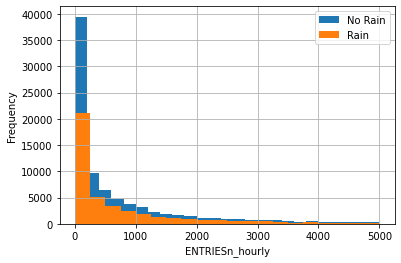

<Figure size 432x288 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt

plt.figure()

# code to plot a historgram for hourly entries when it is not raining
non_rainy_data = turnstile_weather[turnstile_weather['rain'] == 0]['ENTRIESn_hourly']
non_rainy_data.hist(range = [0, 5000], bins = 25, label='No Rain')

# code to plot a historgram for hourly entries when it is raining
rainy_data = turnstile_weather[turnstile_weather['rain'] == 1]['ENTRIESn_hourly']
rainy_data.hist(range = [0, 5000], bins = 20, label='Rain')

plt.xlabel('ENTRIESn_hourly')
plt.ylabel('Frequency')
plt.legend()

plt.figure()

In [ ]:
# Line chart to show the changes in average ridership during different days of the week

from ggplot import *
df = turnstile_master[['DATEn', 'ENTRIESn_hourly']]

q = """
    SELECT cast(strftime('%w', DATEn) AS integer) AS weekday,
           sum(ENTRIESn_hourly)/count(*) AS hourlyentries
    FROM df
    GROUP BY cast(strftime('%w', DATEn) AS integer)
    """

#Execute SQL command against the pandas frame
rainy_days = pandasql.sqldf(q.lower(), locals())

print ggplot(rainy_days, aes('weekday', 'hourlyentries')) + \
        geom_bar(fill = '#007ee5', stat='bar') + \
        scale_x_continuous(name='Weekday',
                           breaks=[0, 1, 2, 3, 4, 5, 6],
                           labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                                   'Thursday', 'Friday', 'Saturday']) + \
        ggtitle('Average ENTRIESn_hourly by Weekday') + \
        ylab('ENTRIESn_hourly') + \
        xlim(-.5, 6.5)

In [ ]:
mean temp on different days - scatter